# ICS-435 Assignment 1


In [7]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn dataset and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

print(" \n libraries imported")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
 
 libraries imported


## 1. Dataset

In [16]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame with dataset
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Tasks

### Data Preprocessing

In [17]:
# Partition into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8
)
print(f"Train size: {len(X_train)} samples, Test size: {len(X_test)} samples")

# Scale features using StandardScaler (for KNN — fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled with StandardScaler. Use X_train_scaled, X_test_scaled for KNN.")

Train size: 455 samples, Test size: 114 samples
Features scaled with StandardScaler. Use X_train_scaled, X_test_scaled for KNN.


### Model Training

In [18]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

KNN
Accuracy: 0.9824561403508771
Precision: 0.9714285714285714
Recall: 1.0
F1-score: 0.9855072463768116
Confusion matrix:
[[44  2]
 [ 0 68]]

Decision Tree
Accuracy: 0.9385964912280702
Precision: 0.9295774647887324
Recall: 0.9705882352941176
F1-score: 0.9496402877697842
Confusion matrix:
[[41  5]
 [ 2 66]]

Random Forest
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 1.0
F1-score: 0.9714285714285714
Confusion matrix:
[[42  4]
 [ 0 68]]

=== Performance comparison ===


,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.982456,0.971429,1.000000,0.985507
1,Decision Tree,0.938596,0.929577,0.970588,0.949640
2,Random Forest,0.964912,0.944444,1.000000,0.971429


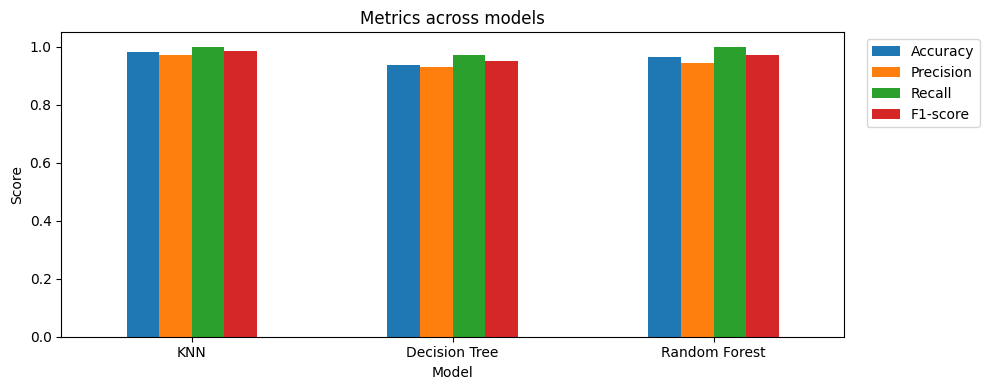

In [19]:
# K-Nearest Neighbors
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_knn, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Decision Tree
print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dt, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_dt, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Random Forest
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_rf, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Comparison table
results_df = pd.DataFrame({
    "Model": ["KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_knn, zero_division=0), precision_score(y_test, y_pred_dt, zero_division=0), precision_score(y_test, y_pred_rf, zero_division=0)],
    "Recall": [recall_score(y_test, y_pred_knn, zero_division=0), recall_score(y_test, y_pred_dt, zero_division=0), recall_score(y_test, y_pred_rf, zero_division=0)],
    "F1-score": [f1_score(y_test, y_pred_knn, zero_division=0), f1_score(y_test, y_pred_dt, zero_division=0), f1_score(y_test, y_pred_rf, zero_division=0)]
})
print("\n=== Performance comparison ===")
display(results_df)

# Bar chart
results_df.set_index("Model").plot(kind="bar", figsize=(10, 4), rot=0)
plt.title("Metrics across models")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Ablation Study

#### KNN: varying n_neighbors

,n_neighbors,Accuracy,Precision,Recall,F1-score
0,1,0.938596,0.955224,0.941176,0.948148
1,5,0.982456,0.971429,1.000000,0.985507
2,10,0.982456,0.971429,1.000000,0.985507
3,15,0.982456,0.971429,1.000000,0.985507
4,20,0.982456,0.971429,1.000000,0.985507
5,25,0.973684,0.957746,1.000000,0.978417


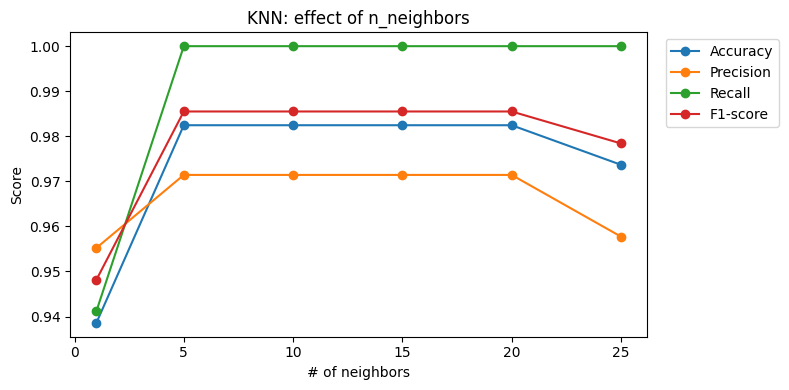

In [20]:
k_values = [1, 5, 10, 15, 20, 25]
knn_ablation = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train_scaled, y_train)
    pred = m.predict(X_test_scaled)
    knn_ablation.append({
        "n_neighbors": k,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1-score": f1_score(y_test, pred, zero_division=0)
    })
knn_abl_df = pd.DataFrame(knn_ablation)
display(knn_abl_df)

knn_abl_df.set_index("n_neighbors")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(marker="o", figsize=(8, 4))
plt.title("KNN: effect of n_neighbors")
plt.xlabel("# of neighbors")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### Decision Tree: varying max_depth

,max_depth,Accuracy,Precision,Recall,F1-score
0,1,0.921053,0.953846,0.911765,0.932331
1,5,0.929825,0.928571,0.955882,0.942029
2,10,0.912281,0.914286,0.941176,0.927536
3,15,0.921053,0.904110,0.970588,0.936170
4,20,0.929825,0.916667,0.970588,0.942857
5,25,0.938596,0.929577,0.970588,0.949640
6,None,0.921053,0.915493,0.955882,0.935252


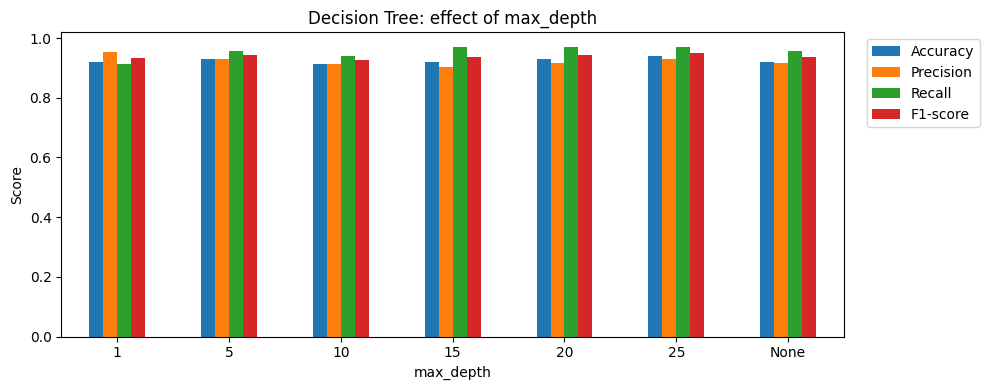

In [24]:
max_depths = [1, 5, 10, 15, 20, 25, None]
dt_ablation = []
for d in max_depths:
    m = DecisionTreeClassifier(max_depth=d)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    dt_ablation.append({
        "max_depth": str(d) if d is not None else "None",
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1-score": f1_score(y_test, pred, zero_division=0)
    })
dt_abl_df = pd.DataFrame(dt_ablation)
display(dt_abl_df)

dt_plot = dt_abl_df.set_index("max_depth")[["Accuracy", "Precision", "Recall", "F1-score"]]
dt_plot.plot(kind="bar", figsize=(10, 4), rot=0)
plt.title("Decision Tree: effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### Random Forest: varying max_depth and min_samples_split

,max_depth,Accuracy,Precision,Recall,F1-score
0,1,0.938596,0.929577,0.970588,0.949640
1,5,0.973684,0.957746,1.000000,0.978417
2,10,0.964912,0.957143,0.985294,0.971014
3,15,0.964912,0.957143,0.985294,0.971014
4,20,0.964912,0.944444,1.000000,0.971429
5,25,0.964912,0.944444,1.000000,0.971429
6,None,0.947368,0.930556,0.985294,0.957143


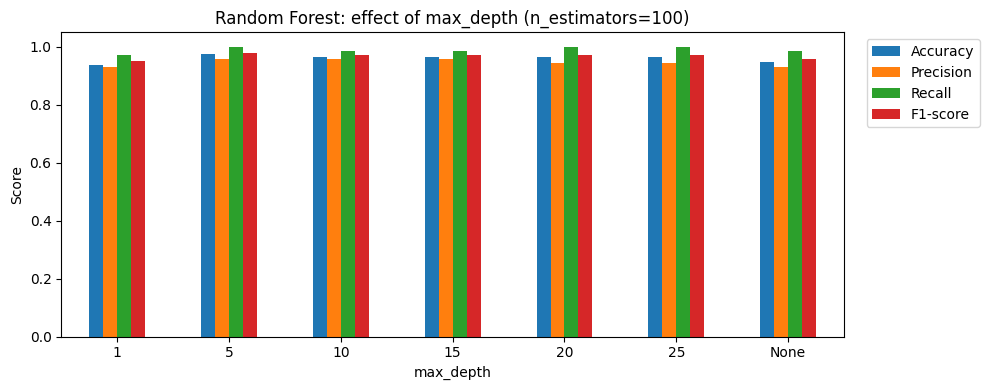

In [25]:
# Vary max_depth (fixed min_samples_split=2)
rf_depths = [1, 5, 10, 15, 20, 25, None]
rf_ablation = []
for d in rf_depths:
    m = RandomForestClassifier(n_estimators=100, max_depth=d)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rf_ablation.append({
        "max_depth": str(d) if d is not None else "None",
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1-score": f1_score(y_test, pred, zero_division=0)
    })
rf_abl_df = pd.DataFrame(rf_ablation)
display(rf_abl_df)

rf_plot = rf_abl_df.set_index("max_depth")[["Accuracy", "Precision", "Recall", "F1-score"]]
rf_plot.plot(kind="bar", figsize=(10, 4), rot=0)
plt.title("Random Forest: effect of max_depth (n_estimators=100)")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### Random Forest: effect of min_samples_split

,min_samples_split,Accuracy,Precision,Recall,F1-score
0,2,0.973684,0.957746,1.000000,0.978417
1,5,0.964912,0.944444,1.000000,0.971429
2,10,0.956140,0.943662,0.985294,0.964029
3,15,0.947368,0.930556,0.985294,0.957143
4,20,0.964912,0.944444,1.000000,0.971429
5,25,0.956140,0.943662,0.985294,0.964029


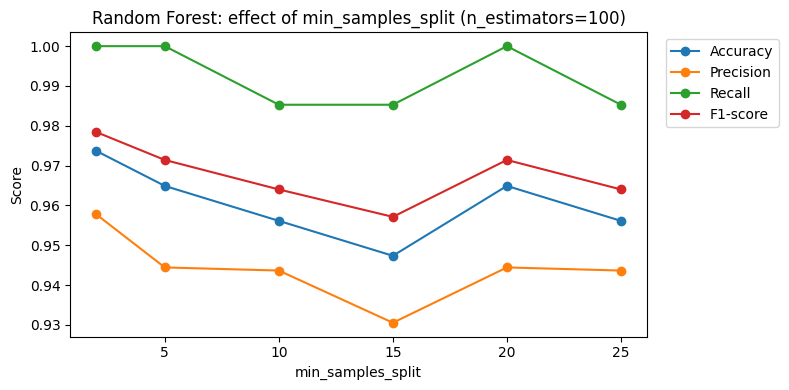

In [27]:
min_splits = [2, 5, 10, 15, 20, 25]
rf_mss_ablation = []
for mss in min_splits:
    m = RandomForestClassifier(n_estimators=100, min_samples_split=mss)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rf_mss_ablation.append({
        "min_samples_split": mss,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1-score": f1_score(y_test, pred, zero_division=0)
    })
rf_mss_df = pd.DataFrame(rf_mss_ablation)
display(rf_mss_df)

rf_mss_df.set_index("min_samples_split")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(marker="o", figsize=(8, 4))
plt.title("Random Forest: effect of min_samples_split (n_estimators=100)")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()